# Numerical Features
Trying to extract numerical features from the data

Number of packets in this observation window of 1sec
Aggregate packet size (sum the sizes of all the packets)  in this observation window of 1sec
Max packet size  in this observation window of 1sec
Median packet size  in this observation window of 1sec
Mean packet size  in this observation window of 1sec
Minimum inter-arrival time  in this observation window of 1sec
Mean inter-arrival time  in this observation window of 1sec
Median inter-arrival time  in this observation window of 1sec

Number of packets for the first 50ms in this observation window of 1sec
Aggregate packet size (sum the sizes of all the packets) for the first 50ms in this observation window of 1sec  
Max packet size for the first 50ms in this observation window of 1sec  
Median packet size for the first 50ms in this observation window of 1sec  
Mean packet size  for the first 50ms in this observation window of 1sec  
Minimum inter-arrival time  for the first 50ms in this observation window of 1sec  
Mean inter-arrival time  for the first 50ms in this observation window of 1sec  
Median inter-arrival time  for the first 50ms in this observation window of 1sec  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def seperate_flows(pcap_df):
    return dict(tuple(pcap_df.groupby('five-tuple')))
pcap_df = pd.read_csv(r"data\teams_data\70.csv")

In [2]:
flows = seperate_flows(pcap_df)
print("total flows: ", len(flows))
flow_stats = []
for flow_key in flows.keys():
    flow = flows[flow_key]
    length = flow.shape[0]
    start = flow.timestamp.min()
    end = flow.timestamp.max()
    total_time = end - start
    iat_sum = flow['iat'].sum()
    md_pkt_sz = flow['packet_size'].median()
    flow_stats.append([flow_key, length, start, end, total_time, iat_sum, md_pkt_sz])

flow_stats_df = pd.DataFrame(flow_stats, columns=['five-tuple', 'size', 'start', 'end', 'total_time', 'iat_sum', 'md_pkt_sz'])
flow_stats_df[flow_stats_df['size'] > flow_stats_df['size'].quantile(.9)]

total flows:  75


,five-tuple,size,start,end,total_time,iat_sum,md_pkt_sz
4,"192.168.20.106,36276,52.114.75.169,443,6",139,1.634653e+09,1.634654e+09,895.341805,895.341805,86.0
14,"192.168.20.106,41757,52.114.74.118,443,6",127,1.634653e+09,1.634654e+09,895.319414,895.319414,60.0
35,"192.168.20.106,50016,87.7.156.90,50009,17",91937,1.634653e+09,1.634654e+09,881.872295,881.872295,131.0
51,"192.168.20.106,50048,87.7.156.90,50053,17",2504,1.634653e+09,1.634654e+09,877.268199,877.268199,114.0
61,"192.168.20.106,54761,52.112.231.10,443,6",144,1.634653e+09,1.634654e+09,917.168446,917.168446,78.0
62,"192.168.20.106,55220,52.114.74.118,443,6",163,1.634653e+09,1.634654e+09,880.026414,880.026414,53.0
68,"192.168.20.106,59109,52.113.194.132,443,6",127,1.634653e+09,1.634653e+09,154.886369,154.886369,78.0
72,"192.168.20.106,59116,52.113.194.132,443,6",98,1.634653e+09,1.634653e+09,123.747642,123.747642,46.0


In [3]:
test_flow_df = pcap_df[pcap_df['five-tuple'] == "192.168.20.106,50016,87.7.156.90,50009,17"]
test_flow_df = test_flow_df.reset_index()

In [4]:
test_flow_df['timestamp'].iloc[0]

1634652950.038114

In [5]:
test_flow_df['c_timestamp'] = pd.to_datetime(test_flow_df['timestamp'], unit='s')

In [6]:
def custom_analysis(chunk):
    first_50 = chunk[chunk.index.microsecond < 50000]
    result = {
        'num_packets': len(chunk),
        'agg_size': chunk['packet_size'].sum(),
        'max_size': chunk['packet_size'].max(),
        'med_size': chunk['packet_size'].median(),
        'mean_size': chunk['packet_size'].mean(),
        'min_iat' : chunk['iat'].min(),
        'mean_iat': chunk['iat'].mean(),
        'med_iat': chunk['iat'].median(),

        'f50_num_packets': len(first_50),
        'f50_agg_size': first_50['packet_size'].sum(),
        'f50_max_size': first_50['packet_size'].max(),
        'f50_med_size': first_50['packet_size'].median(),
        'f50_mean_size': first_50['packet_size'].mean(),
        'f50_min_iat': first_50['iat'].min(),
        'f50_mean_iat': first_50['iat'].mean(),
        'f50_med_iat': first_50['iat'].median()
    }
    #raise Error("hi")
    return pd.Series(result)

flow_features = test_flow_df.set_index('c_timestamp').resample('1s').apply(custom_analysis).fillna(0)

In [7]:
def create_features(flow_df):
    def custom_analysis(chunk):
        first_50 = chunk[chunk.index.microsecond < 50000]
        result = {
            'num_packets': len(chunk),
            'agg_size': chunk['packet_size'].sum(),
            'max_size': chunk['packet_size'].max(),
            'med_size': chunk['packet_size'].median(),
            'mean_size': chunk['packet_size'].mean(),
            'min_iat' : chunk['iat'].min(),
            'mean_iat': chunk['iat'].mean(),
            'med_iat': chunk['iat'].median(),
    
            'f50_num_packets': len(first_50),
            'f50_agg_size': first_50['packet_size'].sum(),
            'f50_max_size': first_50['packet_size'].max(),
            'f50_med_size': first_50['packet_size'].median(),
            'f50_mean_size': first_50['packet_size'].mean(),
            'f50_min_iat': first_50['iat'].min(),
            'f50_mean_iat': first_50['iat'].mean(),
            'f50_med_iat': first_50['iat'].median()
        }
        #raise Error("hi")
        return pd.Series(result)

    flow_features = test_flow_df.set_index('c_timestamp').resample('1s').apply(custom_analysis).fillna(0)
    return flow_features

In [8]:
create_features(test_flow_df)

,num_packets,agg_size,max_size,med_size,mean_size,min_iat,mean_iat,med_iat,f50_num_packets,f50_agg_size,f50_max_size,f50_med_size,f50_mean_size,f50_min_iat,f50_mean_iat,f50_med_iat
c_timestamp,,,,,,,,,,,,,,,,
2021-10-19 14:15:50,4.0,512.0,140.0,128.0,128.000000,0.000000,0.026750,0.016883,1.0,140.0,140.0,140.0,140.00,0.000000,0.000000,0.000000
2021-10-19 14:15:51,2.0,260.0,144.0,130.0,130.000000,0.038643,0.575824,0.575824,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000
2021-10-19 14:15:52,77.0,13891.0,1242.0,122.0,180.402597,0.000009,0.022027,0.009729,1.0,138.0,138.0,138.0,138.00,0.722589,0.722589,0.722589
2021-10-19 14:15:53,109.0,10661.0,194.0,93.0,97.807339,0.000011,0.009188,0.008491,6.0,714.0,194.0,104.0,119.00,0.000999,0.009214,0.007997
2021-10-19 14:15:54,102.0,10523.0,165.0,99.0,103.166667,0.000012,0.009750,0.009005,5.0,467.0,103.0,96.0,93.40,0.007176,0.010162,0.008816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19 14:30:27,105.0,12512.0,164.0,126.0,119.161905,0.000011,0.009566,0.009341,5.0,656.0,142.0,133.0,131.20,0.005547,0.010794,0.009432
2021-10-19 14:30:28,105.0,13090.0,230.0,132.0,124.666667,0.000086,0.009543,0.008788,5.0,598.0,147.0,135.0,119.60,0.000086,0.009814,0.011068
2021-10-19 14:30:29,106.0,17625.0,1242.0,131.5,166.273585,0.000012,0.009357,0.008651,4.0,517.0,163.0,125.0,129.25,0.008401,0.010500,0.009999


In [86]:
five_tuples = ["192.168.20.106,50016,87.7.156.90,50009,17",]#list(flow_stats_df[flow_stats_df['size'] > flow_stats_df['size'].quantile(.9)]['five-tuple'])

In [87]:
prepared_dfs = []
for ft in five_tuples[:5]:
    flow_df = pcap_df[pcap_df['five-tuple'] == ft]
    print(flow_df.size)
    feature_df = create_features(flow_df)
    feature_df['flow'] = ft
    prepared_dfs.append(feature_df)

367748


In [88]:
combined_df = pd.concat(prepared_dfs, ignore_index=True)

In [89]:
from sklearn.decomposition import PCA

X = combined_df.drop(columns=['flow'])
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [90]:
print(pca.explained_variance_ratio_)
transformed = pca.transform(X)

[0.96770711 0.02184379]


In [91]:
pca_df = pd.DataFrame(data=transformed, columns=['PC1', 'PC2'])

Text(0, 0.5, 'Dimension 2')

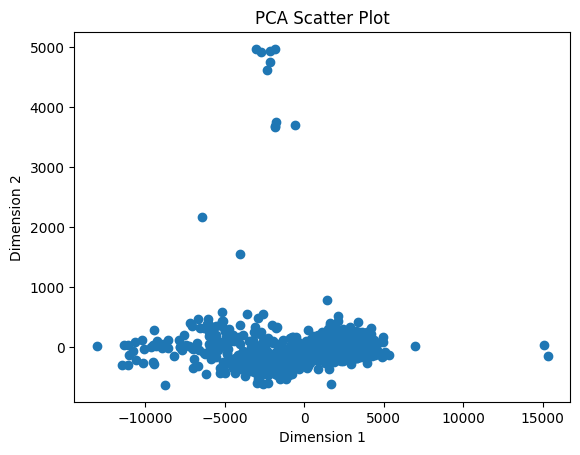

In [92]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [93]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

In [94]:
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension1', 'Dimension2'])

Text(0, 0.5, 'Dimension 2')

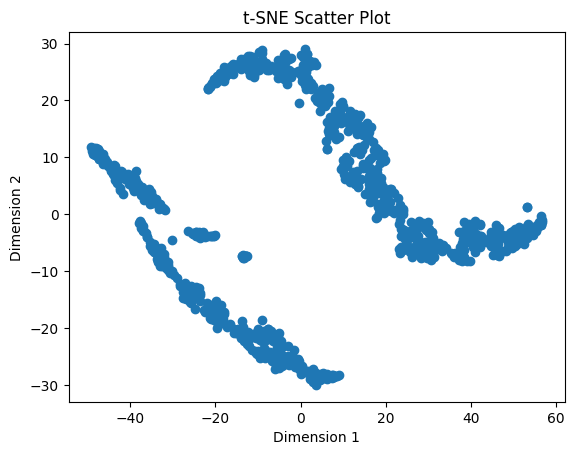

In [95]:
plt.scatter(tsne_df['Dimension1'], tsne_df['Dimension2'])
plt.title('t-SNE Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')